In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from datetime import datetime

import project3_utilities as p3utils

In [2]:
ticker_symbol = input("Choose a stock ticker symbol: ")

# Capture the runtime so we can use it for reference later, that way when
# the model and the other outputs are saved, they have a common reference.
unixtime = int(datetime.now().timestamp())
print("The Unixtime ID of this run is: ", unixtime)

# Pull the stock data from Yahoo! Finance
stock_df = yf.Ticker(ticker_symbol).history(period='max')
display(stock_df.head())

# Because I'm paranoid about getting API banned, write this data to a file.
stock_df.to_csv(f'Stock_Data/{ticker_symbol}-YahooData-{unixtime}.csv')

# Load the data
#stock_df = pd.read_csv('Stock_Data/TSLA-YahooData-1722104572.csv')

The Unixtime ID of this run is:  1722211546


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [3]:
# Get the predictions
(predictions, model) = p3utils.get_LSTM_predictions(df=stock_df, 
                                                    train_test_split=0.8, 
                                                    window_size=365,
                                                    batch_size=100,
                                                    epochs=5)
model.summary()

# Save the model
model.save(f'Saved_Models/{ticker_symbol}-Model-{unixtime}.keras')


Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 267ms/step - accuracy: 0.0000e+00 - loss: 0.0013
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 263ms/step - accuracy: 0.0000e+00 - loss: 1.4737e-04
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 263ms/step - accuracy: 0.0000e+00 - loss: 1.2201e-04
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 264ms/step - accuracy: 0.0000e+00 - loss: 1.1488e-04
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 263ms/step - accuracy: 0.0000e+00 - loss: 1.7816e-04
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 365, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 365, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,741 (643.52 KB)

 Trainable params: 54,913 (214.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 109,828 (429.02 KB)

In [4]:
# Now calculate buy/sell, and add both predictions and buy/sell to the original df.
stock_df = p3utils.generate_buy_sell(stock_df, predictions)
display(stock_df.tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Predictions,Buy_Sell
Date,,,,,,,,,
2024-07-22 00:00:00-04:00,185.000000,185.059998,182.479996,182.550003,39931900,0.0,0.0,165.403961,SELL
2024-07-23 00:00:00-04:00,184.100006,189.389999,183.559998,186.410004,47537700,0.0,0.0,164.562973,BUY
2024-07-24 00:00:00-04:00,183.199997,185.449997,180.410004,180.830002,41532400,0.0,0.0,163.795044,SELL
2024-07-25 00:00:00-04:00,182.910004,183.899994,176.800003,179.850006,44464200,0.0,0.0,163.012177,SELL
2024-07-26 00:00:00-04:00,180.389999,183.190002,180.240005,182.500000,29447400,0.0,0.0,162.184647,BUY


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Predictions,Buy_Sell
Date,,,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,None,None
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,None,SELL
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,None,SELL
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,None,SELL
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,None,SELL


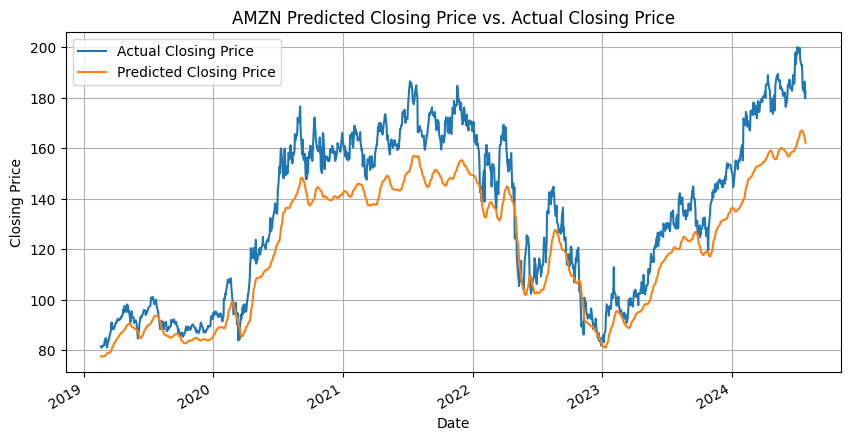

In [5]:
display(stock_df.head())
# Plot the predictions
p3utils.plot_predictions(df=stock_df, 
                 ticker_symbol=ticker_symbol,
                 show_all=False).show()

In [6]:
# Now test if the model worked:
(stock_df, profit_total) = p3utils.score_the_model(stock_df)

display(stock_df.tail(10))
print(f"Using this model, we would have made ${profit_total} by following the BUY instruction.")

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Predictions,Buy_Sell,Profit
Date,,,,,,,,,,
2024-07-15 00:00:00-04:00,194.559998,196.190002,190.830002,192.720001,40683200,0.0,0.0,167.025574,SELL,0.000000
2024-07-16 00:00:00-04:00,195.589996,196.619995,192.240005,193.020004,33994700,0.0,0.0,167.065735,BUY,-2.569992
2024-07-17 00:00:00-04:00,191.350006,191.580002,185.990005,187.929993,48076100,0.0,0.0,167.030655,SELL,0.000000
2024-07-18 00:00:00-04:00,189.589996,189.679993,181.449997,183.750000,51043600,0.0,0.0,166.7397,SELL,0.000000
2024-07-19 00:00:00-04:00,181.139999,184.929993,180.110001,183.130005,43081800,0.0,0.0,166.20491,SELL,0.000000
2024-07-22 00:00:00-04:00,185.000000,185.059998,182.479996,182.550003,39931900,0.0,0.0,165.403961,SELL,0.000000
2024-07-23 00:00:00-04:00,184.100006,189.389999,183.559998,186.410004,47537700,0.0,0.0,164.562973,BUY,2.309998
2024-07-24 00:00:00-04:00,183.199997,185.449997,180.410004,180.830002,41532400,0.0,0.0,163.795044,SELL,0.000000
2024-07-25 00:00:00-04:00,182.910004,183.899994,176.800003,179.850006,44464200,0.0,0.0,163.012177,SELL,0.000000


Using this model, we would have made $1313.2584109604359 by following the BUY instruction.


In [7]:
# Finally, let's write this data to a file for reference later
stock_df.to_csv(f'Saved_Predictions/{ticker_symbol}-Predictions-{unixtime}.csv')